<a href="https://colab.research.google.com/github/PrasheethaArcot/demo/blob/main/NB1_PortfolioConstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crypto Portfolio Construction


In [ ]:
import numpy as np
import pandas as pd

import time
from datetime import datetime, timedelta, date

import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Coin Market Cap

- https://coinmarketcap.com/

<b>2024-12-12</b>

In [ ]:
#cmc_key = ''
#print(cmc_key)

In [ ]:
# Number of Coins Parameter

#num_coins = 10

In [ ]:
# Get Top 10 Coins from CoinMarketCap

#cmc_headers = {
#    'X-CMC_PRO_API_KEY': cmc_key
#}

#coinlist_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#coinlist_parameters = {
#  'limit': num_coins
#}
#coinlist_res = requests.get(coinlist_url, headers=cmc_headers, params=coinlist_parameters)
#coinlist_json = coinlist_res.json()
#ranking_list_df = pd.DataFrame(coinlist_json['data'])
#ranking_list_df.to_csv('top10_20241212.csv')

In [ ]:
#ranking_list_df = pd.read_csv('top10_20241212.csv')
#symbols = ranking_list_df['symbol'].tolist()
#symbols

In [ ]:
# 10 highest ranking cryptos

cryptos = ['BTC', 'ETH', 'USDT', 'XRP', 'SOL', 'BNB', 'DOGE', 'USDC', 'ADA', 'TRX']

In [ ]:
hist_prices_df = pd.read_csv('top10S_prices_20241212.csv')
hist_prices_df

,symbol,date,close
0,ADA,2023-12-12,0.576407
1,ADA,2023-12-13,0.665244
2,ADA,2023-12-14,0.643478
3,ADA,2023-12-15,0.601408
4,ADA,2023-12-16,0.607609
...,...,...,...
3655,XRP,2024-12-07,2.616624
3656,XRP,2024-12-08,2.608348
3657,XRP,2024-12-09,2.218952
3658,XRP,2024-12-10,2.369160


In [ ]:
hist_prices_df = hist_prices_df.set_index(['symbol','date'])
hist_prices_df

close
symbol date                
ADA    2023-12-12  0.576407
       2023-12-13  0.665244
       2023-12-14  0.643478
       2023-12-15  0.601408
       2023-12-16  0.607609
...                     ...
XRP    2024-12-07  2.616624
       2024-12-08  2.608348
       2024-12-09  2.218952
       2024-12-10  2.369160
       2024-12-11  2.400070

[3660 rows x 1 columns]

In [ ]:
crypto_prices = hist_prices_df[['close']].reset_index().pivot(index='date', columns='symbol', values='close')
crypto_prices

KeyError: 'date'

In [ ]:
crypto_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2023-12-12 to 2024-12-11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADA     366 non-null    float64
 1   BNB     366 non-null    float64
 2   BTC     366 non-null    float64
 3   DOGE    366 non-null    float64
 4   ETH     366 non-null    float64
 5   SOL     366 non-null    float64
 6   TRX     366 non-null    float64
 7   USDC    366 non-null    float64
 8   USDT    366 non-null    float64
 9   XRP     366 non-null    float64
dtypes: float64(10)
memory usage: 31.5+ KB


In [ ]:
hist_prices_df = pd.read_csv('top10S_prices_20241212.csv')
hist_prices_df

,symbol,date,close
0,ADA,2023-12-12,0.576407
1,ADA,2023-12-13,0.665244
2,ADA,2023-12-14,0.643478
3,ADA,2023-12-15,0.601408
4,ADA,2023-12-16,0.607609
...,...,...,...
3655,XRP,2024-12-07,2.616624
3656,XRP,2024-12-08,2.608348
3657,XRP,2024-12-09,2.218952
3658,XRP,2024-12-10,2.369160


In [ ]:
crypto_prices = hist_prices_df.pivot('date','symbol','close')
crypto_prices

symbol,ADA,BNB,BTC,DOGE,ETH,SOL,TRX,USDC,USDT,XRP
date,,,,,,,,,,
2023-12-12,0.576407,254.494987,41450.222190,0.093835,2202.037968,68.540681,0.103626,1.000305,0.999786,0.619549
2023-12-13,0.665244,252.423331,42890.740734,0.096428,2260.648768,70.767784,0.104300,1.000003,1.000191,0.628486
2023-12-14,0.643478,253.541220,43023.971974,0.098255,2316.579007,75.620332,0.105985,0.999977,1.000155,0.632432
2023-12-15,0.601408,244.898442,41929.758393,0.093004,2219.337310,72.368991,0.101563,1.000170,1.000150,0.615492
2023-12-16,0.607609,244.350960,42240.119082,0.097056,2226.926520,73.473502,0.102756,0.999973,0.999182,0.619835
...,...,...,...,...,...,...,...,...,...,...
2024-12-07,1.214196,750.272614,99923.336619,0.453887,4002.692701,238.547962,0.319312,0.999959,1.000911,2.616624
2024-12-08,1.196291,743.295674,101236.013140,0.467297,4005.704576,236.672326,0.318823,1.000134,1.000801,2.608348
2024-12-09,1.007549,689.924393,97432.721260,0.414719,3718.690456,217.341468,0.263300,0.999960,1.000447,2.218952


In [ ]:
crypto_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2023-12-12 to 2024-12-11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADA     366 non-null    float64
 1   BNB     366 non-null    float64
 2   BTC     366 non-null    float64
 3   DOGE    366 non-null    float64
 4   ETH     366 non-null    float64
 5   SOL     366 non-null    float64
 6   TRX     366 non-null    float64
 7   USDC    366 non-null    float64
 8   USDT    366 non-null    float64
 9   XRP     366 non-null    float64
dtypes: float64(10)
memory usage: 31.5+ KB


# Normalized Prices

In [ ]:
crypto_prices_normed = crypto_prices / crypto_prices.iloc[0]
crypto_prices_normed

symbol,ADA,BNB,BTC,DOGE,ETH,SOL,TRX,USDC,USDT,XRP
date,,,,,,,,,,
2023-12-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-12-13,1.154123,0.991860,1.034753,1.027633,1.026617,1.032493,1.006500,0.999698,1.000405,1.014424
2023-12-14,1.116361,0.996252,1.037967,1.047099,1.052016,1.103291,1.022762,0.999672,1.000369,1.020794
2023-12-15,1.043374,0.962292,1.011569,0.991141,1.007856,1.055855,0.980085,0.999865,1.000364,0.993452
2023-12-16,1.054133,0.960141,1.019057,1.034319,1.011303,1.071969,0.991597,0.999668,0.999396,1.000461
...,...,...,...,...,...,...,...,...,...,...
2024-12-07,2.106492,2.948084,2.410683,4.837055,1.817722,3.480385,3.081373,0.999655,1.001126,4.223430
2024-12-08,2.075430,2.920669,2.442352,4.979960,1.819090,3.453020,3.076661,0.999829,1.001015,4.210073
2024-12-09,1.747983,2.710955,2.350596,4.419641,1.688749,3.170985,2.540860,0.999655,1.000661,3.581557


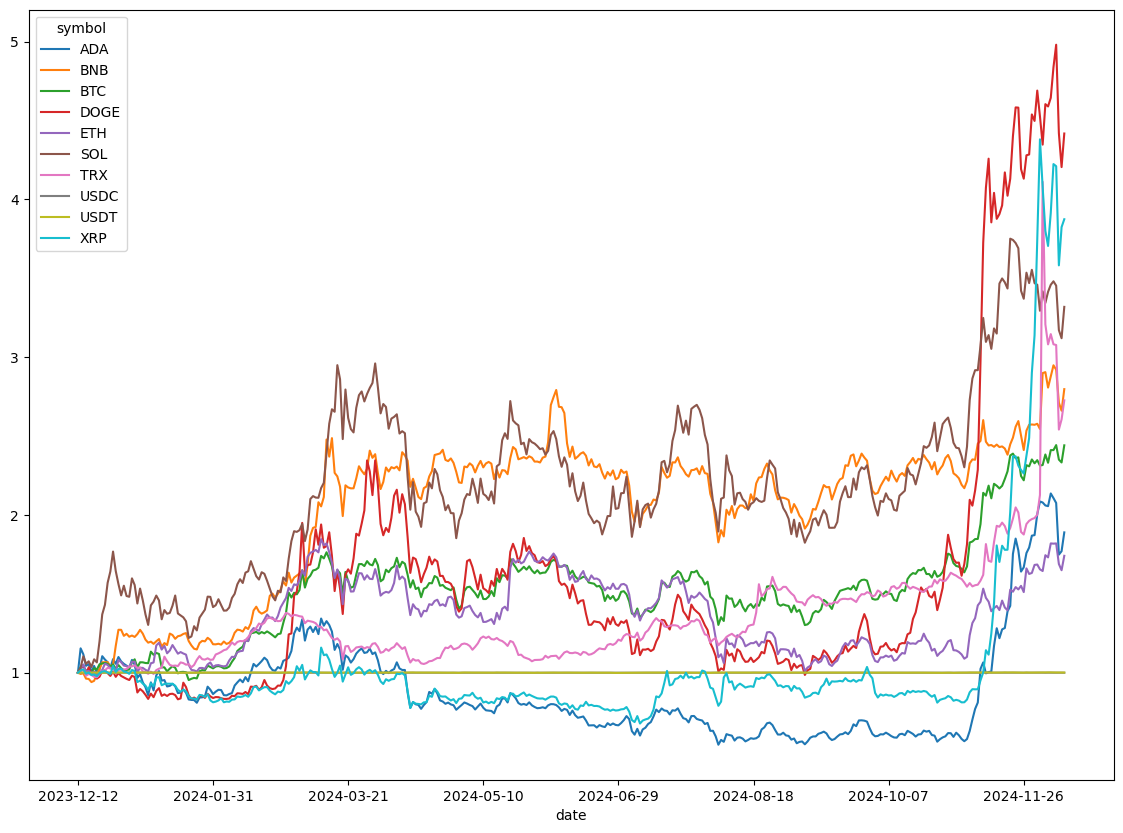

In [ ]:
crypto_prices_normed.plot(figsize=(14, 10));
plt.show();

# Daily Returns for BTC

In [ ]:
crypto_prices_pct = crypto_prices.pct_change(1).dropna()
crypto_prices_pct

symbol,ADA,BNB,BTC,DOGE,ETH,SOL,TRX,USDC,USDT,XRP
date,,,,,,,,,,
2023-12-13,0.154123,-0.008140,0.034753,0.027633,0.026617,0.032493,0.006500,-0.000302,0.000405,0.014424
2023-12-14,-0.032719,0.004429,0.003106,0.018942,0.024741,0.068570,0.016156,-0.000026,-0.000035,0.006280
2023-12-15,-0.065379,-0.034088,-0.025433,-0.053440,-0.041976,-0.042996,-0.041727,0.000193,-0.000006,-0.026785
2023-12-16,0.010311,-0.002236,0.007402,0.043564,0.003420,0.015262,0.011745,-0.000197,-0.000967,0.007055
2023-12-17,-0.044922,-0.020637,-0.020726,-0.040787,-0.013671,-0.033658,-0.006273,0.000573,0.000696,-0.015192
...,...,...,...,...,...,...,...,...,...,...
2024-12-07,-0.013736,0.024954,0.000026,0.041721,-0.000778,0.006315,-0.020471,0.000116,-0.000627,0.079137
2024-12-08,-0.014746,-0.009299,0.013137,0.029544,0.000752,-0.007863,-0.001529,0.000175,-0.000110,-0.003163
2024-12-09,-0.157773,-0.071804,-0.037569,-0.112515,-0.071651,-0.081678,-0.174150,-0.000174,-0.000354,-0.149289


<Axes: ylabel='Frequency'>

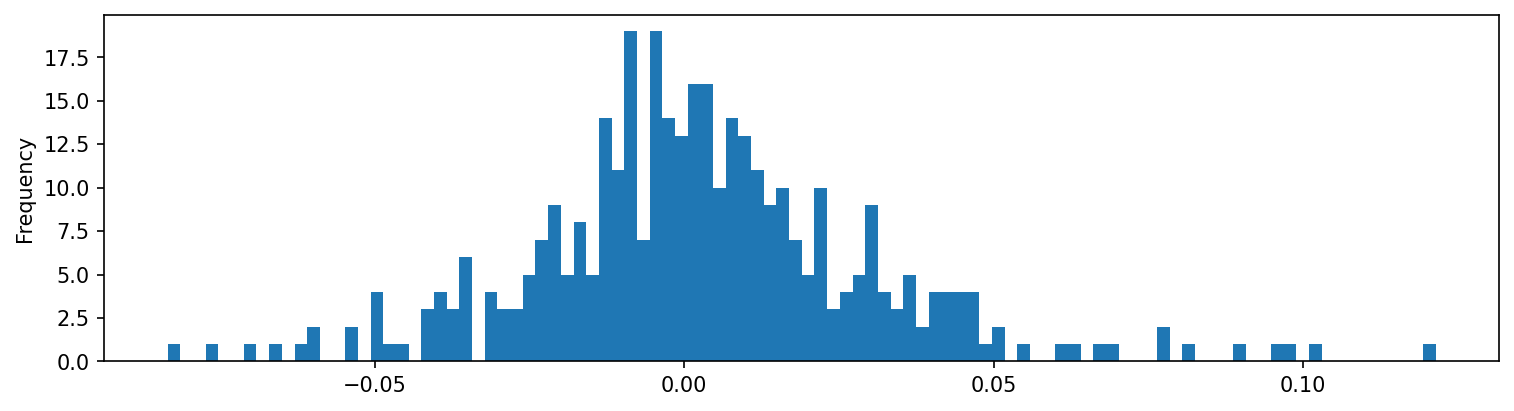

In [ ]:
plt.figure(dpi=150)
crypto_prices_pct['BTC'].plot(kind='hist',bins=100,figsize=(12,3))

## Cumulative Return

In [ ]:
btc_cumul_return = (1 + crypto_prices_pct['BTC']).cumprod() - 1
btc_cumul_return

date
2023-12-13    0.034753
2023-12-14    0.037967
2023-12-15    0.011569
2023-12-16    0.019057
2023-12-17   -0.002064
                ...   
2024-12-07    1.410683
2024-12-08    1.442352
2024-12-09    1.350596
2024-12-10    1.332326
2024-12-11    1.440832
Name: BTC, Length: 365, dtype: float64

In [ ]:
btc_cumul_return_pct = btc_cumul_return * 100
btc_cumul_return_pct

date
2023-12-13      3.475298
2023-12-14      3.796722
2023-12-15      1.156897
2023-12-16      1.905652
2023-12-17     -0.206407
                 ...    
2024-12-07    141.068277
2024-12-08    144.235152
2024-12-09    135.059587
2024-12-10    133.232606
2024-12-11    144.083209
Name: BTC, Length: 365, dtype: float64

Text(0, 0.5, 'Cumulative Return as %')

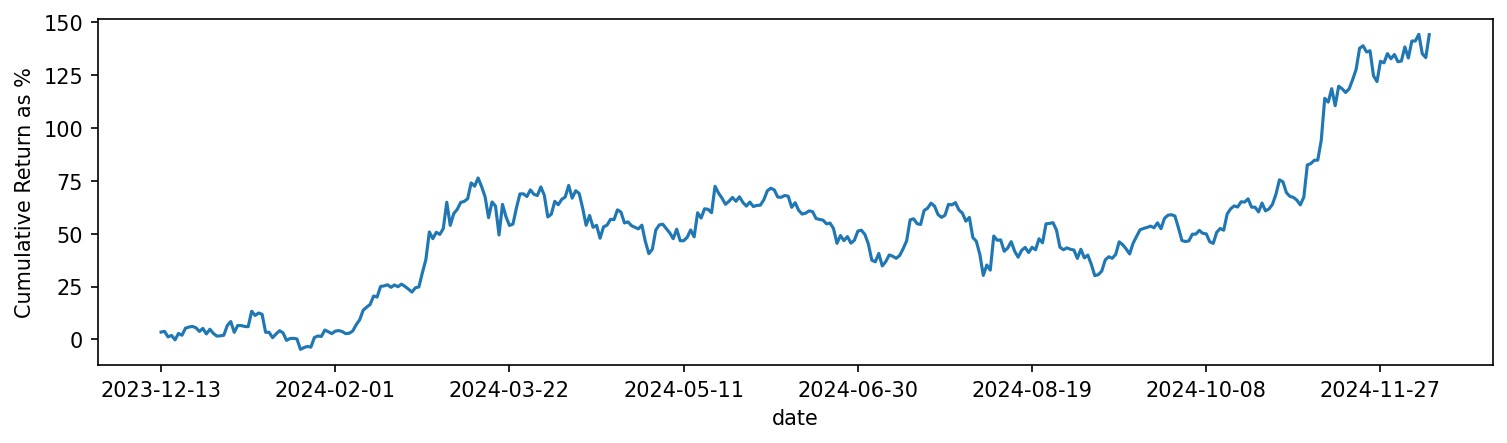

In [ ]:
plt.figure(dpi=150)
btc_cumul_return_pct.plot(figsize=(12,3))
plt.ylabel("Cumulative Return as %")

## Equal Weights, 1/N Weighting

In [ ]:
crypto_prices_pct.shape

(365, 10)

In [ ]:
N = len(crypto_prices_pct.columns)
equal_weights = N * [1/N]
equal_weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
equal_weight_returns = np.dot(equal_weights,crypto_prices_pct.transpose())
equal_weight_returns

array([ 2.88506020e-02,  1.09443825e-02, -3.31637825e-02,  9.53599696e-03,
       -1.94597929e-02,  1.10943913e-02, -7.16131803e-03,  2.74444812e-02,
        3.56201908e-02,  7.68524781e-03,  5.90508305e-03, -7.99826028e-03,
        2.33060168e-02, -1.22677920e-02,  2.32593957e-02, -1.18289693e-02,
       -6.34397645e-03, -5.42028491e-03, -3.67861628e-03,  2.65003901e-02,
       -5.34995772e-03, -4.31874732e-02,  2.06684214e-02, -1.80173358e-02,
       -1.85730017e-02, -1.99130343e-02,  4.14769968e-02, -1.22286653e-02,
        3.89320315e-02,  6.05186613e-03, -3.93697339e-02,  1.73476525e-02,
       -1.70969019e-02,  9.53672725e-03,  8.16577922e-03, -4.49624910e-03,
       -2.32066392e-02,  2.94842031e-03,  1.47639059e-02, -9.83601169e-03,
       -3.67469195e-02, -1.02918701e-02,  6.34334508e-03, -4.72364999e-03,
        2.92712563e-02,  2.13274127e-03, -1.42007874e-03,  2.66459555e-02,
       -1.02339065e-02, -1.58114758e-02,  8.88330237e-03,  6.13966840e-03,
       -2.45018521e-03, -

In [ ]:
equal_weight_cumul_returns = (1 + equal_weight_returns).cumprod() - 1
equal_weight_cumul_returns

array([ 2.88506020e-02,  4.01107366e-02,  5.61673029e-03,  1.52062884e-02,
       -4.54941574e-03,  6.49450251e-03, -7.13324710e-04,  2.67115796e-02,
        6.32832420e-02,  7.14548372e-02,  7.77818670e-02,  6.91614871e-02,
        9.40793827e-02,  8.06574443e-02,  1.05792883e-01,  9.27124934e-02,
        8.57803510e-02,  7.98951122e-02,  7.59225924e-02,  1.04434961e-01,
        9.85262805e-02,  5.10837063e-02,  7.28079472e-02,  5.34788062e-02,
        3.39125425e-02,  1.33242066e-02,  5.53538514e-02,  4.24482823e-02,
        8.30329117e-02,  8.95872819e-02,  4.66905205e-02,  6.48481440e-02,
        4.66425397e-02,  5.66240841e-02,  6.52522431e-02,  6.04626036e-02,
        3.58528306e-02,  3.89069601e-02,  5.42452848e-02,  4.38757158e-02,
        5.51649887e-03, -4.83214630e-03,  1.48054682e-03, -3.25009676e-03,
        2.59260251e-02,  2.81140599e-02,  2.66540570e-02,  5.40102353e-02,
        4.32235931e-02,  2.67286885e-02,  3.58494299e-02,  4.22092019e-02,
        3.96555963e-02,  

In [ ]:
equal_weight_cumul_pct = pd.Series(100 * equal_weight_cumul_returns)
equal_weight_cumul_pct.index = crypto_prices_pct.index

<Axes: xlabel='date'>

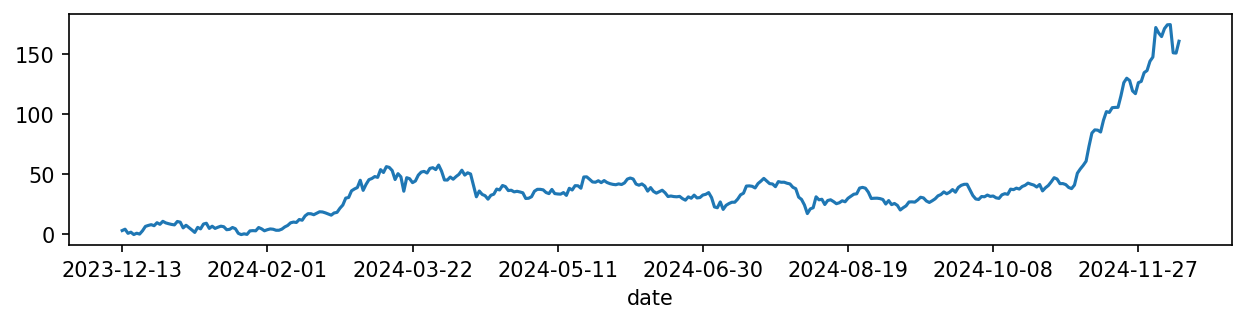

In [ ]:
plt.figure(dpi=150)
equal_weight_cumul_pct.plot(figsize=(10,2))

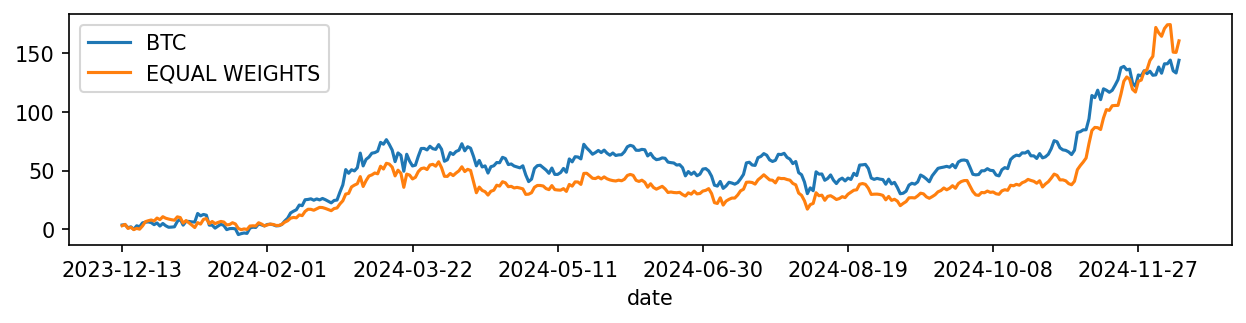

In [ ]:
plt.figure(dpi=150)
btc_cumul_return_pct.plot(figsize=(10,2),label='BTC')
equal_weight_cumul_pct.plot(figsize=(10,2),label='EQUAL WEIGHTS')
plt.legend()

In [ ]:
equal_weight_pct = pd.Series(equal_weight_returns)
equal_weight_pct.index = crypto_prices_pct.index

In [ ]:
equal_weight_pct.info()

<class 'pandas.core.series.Series'>
Index: 365 entries, 2023-12-13 to 2024-12-11
Series name: None
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 13.8+ KB


<Axes: ylabel='Frequency'>

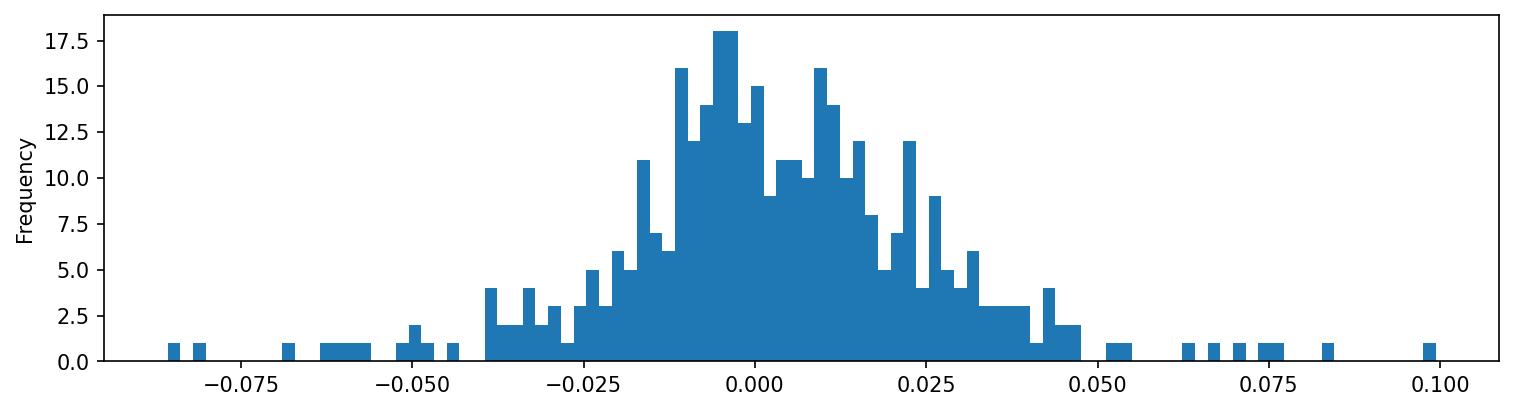

In [ ]:
plt.figure(dpi=150)
equal_weight_pct.plot(kind='hist',bins=100,figsize=(12,3))